In [1]:
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt

# All timing are in micro seconds (us) 

In [15]:
df_oob = pd.read_csv("./results/oob_pw.csv")
df_opt = pd.read_csv("./results/op_pw_0.csv")
df_oob = df_oob[df_oob['m'] != 256]
df_opt = df_opt[df_opt['m'] != 256]

df_oob = df_oob[df_oob['m'] != 3072]
df_opt = df_opt[df_opt['m'] != 3072]

pd.options.display.max_rows = 999
confs = list(df_oob['conf'].values)
unq_m = df_oob['m'].unique()
n_confs = int(df_oob.shape[0] / len(unq_m))
df_oob

,conf,m,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,utilization_vs_user_grid_perc,utilization_vs_full_grid_perc,run,tflops,voltage,current,power,aiclk,temp,iters
1,f16_m2,512,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,0.94%,0.68%,217.863719,1.232126,0.760,33.0,24.0,1000.0,41.56250,300
2,f16_m2,1024,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,7.32%,5.32%,223.926703,9.590119,0.760,35.0,26.0,1000.0,44.31250,300
3,f16_m2,2048,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,14.43%,10.50%,908.064842,18.919210,0.760,41.0,31.0,1000.0,46.37500,300
5,f16_m2,4096,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,22.78%,16.57%,4602.332910,29.862888,0.750,57.5,45.0,954.0,50.46875,300
6,f16_m2,8192,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,25.68%,18.68%,32668.058872,33.657085,0.750,56.5,43.0,1000.0,52.34375,300
8,f16_m4,512,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,1.84%,1.34%,222.201347,1.208073,0.760,43.0,33.0,1000.0,51.37500,300
9,f16_m4,1024,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,14.03%,10.20%,233.628750,9.191864,0.760,43.0,33.0,1000.0,51.18750,300
10,f16_m4,2048,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,26.47%,19.25%,990.222295,17.349508,0.760,43.0,33.0,1000.0,51.00000,300
12,f16_m4,4096,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,34.15%,24.84%,6140.489578,22.382410,0.755,57.5,43.5,982.5,52.53125,300
13,f16_m4,8192,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,37.61%,27.35%,44605.708122,24.649572,0.760,56.0,42.5,1000.0,53.71875,300


In [3]:
def get_column_df_info(df_inf, d_name, c_name = 'conf', mean=False):
    data = dict()
    c_list = df_inf[c_name].unique()

    for c in c_list:
        data[c] = list()

        for m in unq_m:
            val0 = df_inf.loc[(df_inf['m'] == m) & (df_inf[c_name] == c)][d_name].values
            if mean:
                val0 = val0.mean()
            else:
                val0 = val0[0]
            data[c].append(val0)

    df_c = pd.DataFrame.from_dict(data)
    df_c.set_index(unq_m, inplace=True)
    return df_c

In [4]:
df_opt = df_opt.loc[df_opt['conf'].isin(df_oob['conf'].unique()) & df_opt['m'].isin(df_oob['m'].unique())]
df_opt

,conf,m,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,utilization_vs_user_grid_perc,utilization_vs_full_grid_perc,run,tflops,voltage,current,power,aiclk,temp,iters
1,f16_m2,512,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,0.84%,0.61%,245.137215,1.095042,0.760,33.0,24.0,1000.0,45.62500,300
2,f16_m2,1024,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,6.68%,4.86%,245.331128,8.753409,0.760,36.0,27.0,1000.0,48.18750,300
3,f16_m2,2048,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,33.02%,24.01%,396.983624,43.276015,0.760,41.0,30.0,1000.0,49.87500,300
5,f16_m2,4096,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,24.83%,18.06%,4223.375320,32.542444,0.758,55.5,43.0,1000.0,53.53125,300
6,f16_m2,8192,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,29.58%,21.51%,28362.441063,38.766467,0.746,58.5,44.5,976.0,54.68750,300
8,f16_m4,512,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,1.63%,1.18%,251.964728,1.065369,0.758,43.0,34.0,1000.0,53.50000,300
9,f16_m4,1024,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,12.61%,9.17%,259.942214,8.261389,0.760,43.0,34.0,1000.0,53.43750,300
10,f16_m4,2048,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,39.85%,28.98%,657.783349,26.117823,0.753,43.0,34.0,1000.0,53.12500,300
12,f16_m4,4096,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,34.28%,24.93%,6117.087205,22.468039,0.760,56.0,42.5,1000.0,53.56250,300
13,f16_m4,8192,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,38.07%,27.69%,44072.322051,24.947894,0.760,57.5,43.5,1000.0,55.06250,300


In [16]:
df_oob_inf = get_column_df_info(df_oob, 'tflops')
df_opt_inf = get_column_df_info(df_opt, 'tflops')
# df_opt_inf.columns = [str(c + "_opt") for c in df_opt_inf.columns]
# df_inf = pd.concat([df_oob_inf, df_opt_inf], axis=1)
# df_inf

In [2]:
1024 * 112 * 2 / 1e3

229.376

In [17]:
df_oob_inf

,f16_m2,f16_m4
512,1.232126,1.208073
1024,9.590119,9.191864
2048,18.919210,17.349508
4096,29.862888,22.382410
8192,33.657085,24.649572


In [18]:
df_opt_inf

,f16_m2,f16_m4
512,1.095042,1.065369
1024,8.753409,8.261389
2048,43.276015,26.117823
4096,32.542444,22.468039
8192,38.766467,24.947894


## Inference

In [19]:
df_oob_inf 

,f16_m2,f16_m4
512,1.232126,1.208073
1024,9.590119,9.191864
2048,18.919210,17.349508
4096,29.862888,22.382410
8192,33.657085,24.649572


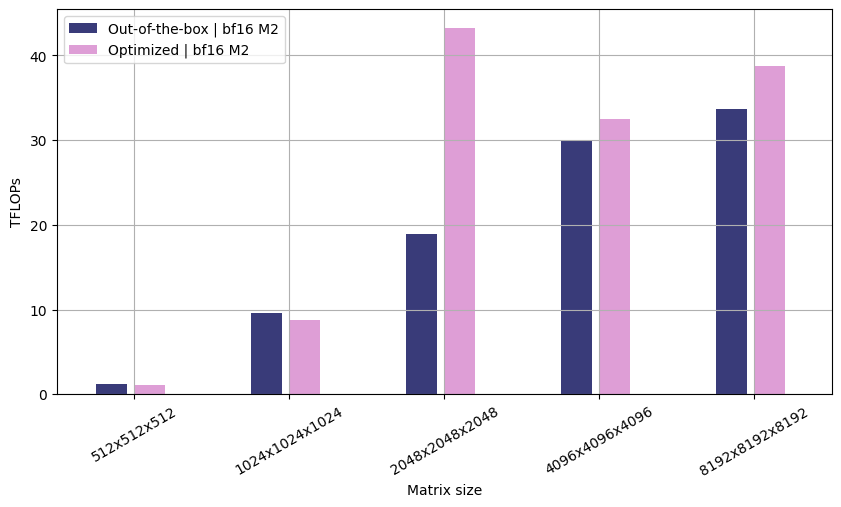

In [26]:
fig, ax = plt.subplots()
conf = 'f16_m2'
df_concat = pd.concat([df_oob_inf[conf], df_opt_inf[conf]], axis=1)
df_concat.columns = ['Out-of-the-box | bf16 M2','Optimized | bf16 M2']
plot = df_concat.plot(kind='bar', figsize=(10, 5), colormap="tab20b", ax=ax)
plot.set_xticklabels([f"{k}x{k}x{k}" for k in df_opt_inf.index], rotation=30)
for bar in ax.patches:
    bar.set_width(bar.get_width() * 0.8)
plt.ylabel("TFLOPs")
plot.legend(loc='upper left')
plt.xlabel("Matrix size")
plt.grid(True)
plt.show()

plt.show()

## Only in0 in L1, base kernel 

In [21]:
df_L1 = pd.read_csv("./results/op_pw_only_L1.csv")
df_L1 = df_L1[df_L1['m'] != 256]
df_L1 = df_L1[df_L1['m'] != 3072]

pd.options.display.max_rows = 999
confs = list(df_oob['conf'].values)
unq_m = df_oob['m'].unique()
n_confs = int(df_oob.shape[0] / len(unq_m))
df_L1

,conf,m,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,utilization_vs_user_grid_perc,utilization_vs_full_grid_perc,run,tflops,voltage,current,power,aiclk,temp,iters
1,f16_m2,512,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,0.79%,0.58%,257.747173,1.041468,0.760,33.0,24.0,1000.0,44.62500,300
2,f16_m2,1024,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,6.20%,4.51%,264.246464,8.126821,0.760,37.0,27.0,1000.0,45.93750,300
3,f16_m2,2048,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi2,24.77%,18.01%,529.261430,32.460082,0.760,41.0,30.0,1000.0,48.00000,300
5,f16_m2,4096,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,22.76%,16.56%,4606.151581,29.838131,0.751,54.5,43.0,1000.0,51.00000,300
6,f16_m2,8192,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,25.65%,18.65%,32705.900669,33.618142,0.750,57.5,43.5,975.0,52.68750,300
8,f16_m4,512,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,1.53%,1.11%,268.201033,1.000874,0.760,43.0,34.0,1000.0,52.18750,300
9,f16_m4,1024,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,12.26%,8.92%,267.274380,8.034753,0.760,43.0,34.0,1000.0,51.68750,300
10,f16_m4,2048,"(8, 8)",L1,DRAM,L1,DataType.BFLOAT16,MathFidelity.HiFi4,39.82%,28.96%,658.315818,26.096698,0.760,43.0,34.0,1000.0,51.31250,300
12,f16_m4,4096,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,34.13%,24.82%,6143.856843,22.370143,0.760,57.0,43.0,989.0,53.18750,300
13,f16_m4,8192,"(8, 8)",DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi4,37.50%,27.27%,44736.437798,24.577541,0.750,58.5,44.5,971.5,55.40625,300


In [22]:
df_L1_inf = get_column_df_info(df_L1, 'tflops')

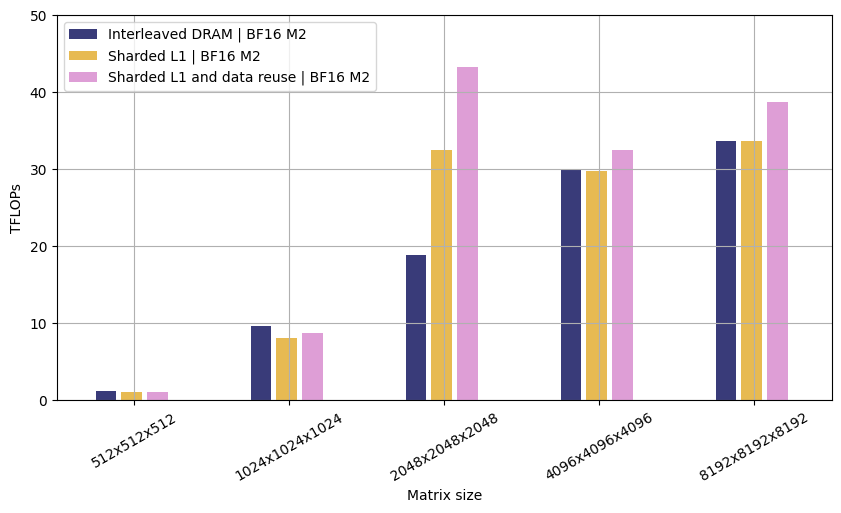

In [29]:
fig, ax = plt.subplots()
conf = 'f16_m2'
df_concat = pd.concat([df_oob_inf[conf], df_L1_inf[conf], df_opt_inf[conf]], axis=1)
df_concat.columns = ['Interleaved DRAM | BF16 M2', 'Sharded L1 | BF16 M2', 'Sharded L1 and data reuse | BF16 M2']
plot = df_concat.plot(kind='bar', figsize=(10, 5), colormap="tab20b", ax=ax)
plot.set_xticklabels([f"{k}x{k}x{k}" for k in df_L1_inf.index], rotation=30)
for bar in ax.patches:
    bar.set_width(bar.get_width() * 0.8)
plt.ylabel("TFLOPs")
ax.set_ylim(0, 50)
plot.legend(loc='upper left')
plt.xlabel("Matrix size")
plt.grid(True)
plt.show()

plt.show()

In [38]:
df_concat['Speedup'] = (df_concat['Sharded L1 and data reuse | BF16 M4'] - df_concat['Interleaved DRAM | BF16 M4']) / df_concat['Interleaved DRAM | BF16 M4']
df_concat

,Interleaved DRAM | BF16 M4,Sharded L1 | BF16 M4,Sharded L1 and data reuse | BF16 M4,Speedup
512,1.208073,1.000874,1.065369,-0.118125
1024,9.191864,8.034753,8.261389,-0.101228
2048,17.349508,26.096698,26.117823,0.505393
4096,22.382410,22.370143,22.468039,0.003826
8192,24.649572,24.577541,24.947894,0.012103


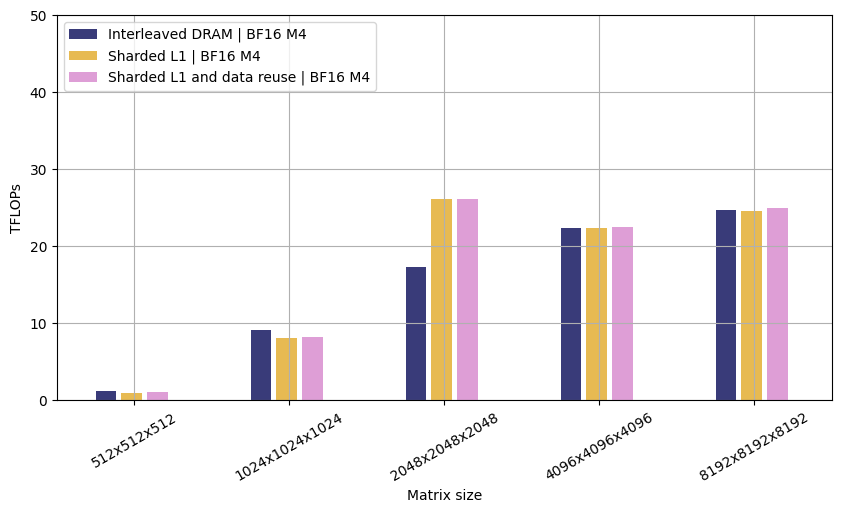

In [30]:
fig, ax = plt.subplots()
conf = 'f16_m4'
df_concat = pd.concat([df_oob_inf[conf], df_L1_inf[conf], df_opt_inf[conf]], axis=1)
df_concat.columns = ['Interleaved DRAM | BF16 M4', 'Sharded L1 | BF16 M4', 'Sharded L1 and data reuse | BF16 M4']
plot = df_concat.plot(kind='bar', figsize=(10, 5), colormap="tab20b", ax=ax)
plot.set_xticklabels([f"{k}x{k}x{k}" for k in df_L1_inf.index], rotation=30)
for bar in ax.patches:
    bar.set_width(bar.get_width() * 0.8)
plt.ylabel("TFLOPs")
ax.set_ylim(0, 50)

plot.legend(loc='upper left')
plt.xlabel("Matrix size")
plt.grid(True)
plt.show()

plt.show()